GCSE and A Level data extracted from https://analytics.ofqual.gov.uk/

In [174]:
import pandas as pd

gcse_data = pd.read_csv(r'C:\Users\Gareth.Ahern\Desktop\GCSE_data_Computer science_2020_All ages_7 and above.csv')
gcse_data.head(10)

,Year,Subject,AgeGroup,Grade,County,Number of candidates,CountyPercent,NationalPercent
0,2020,Computer science,All ages,7 and above,Bedfordshire,"1,015",30.3,33.5
1,2020,Computer science,All ages,7 and above,Berkshire,"2,010",38.7,33.5
2,2020,Computer science,All ages,7 and above,Buckinghamshire,"1,355",40.8,33.5
3,2020,Computer science,All ages,7 and above,Cambridgeshire,"1,100",36.5,33.5
4,2020,Computer science,All ages,7 and above,Cheshire,"1,495",31.7,33.5
5,2020,Computer science,All ages,7 and above,Cornwall,550,26.5,33.5
6,2020,Computer science,All ages,7 and above,County of Bristol,455,42.7,33.5
7,2020,Computer science,All ages,7 and above,Cumbria,710,27.1,33.5
8,2020,Computer science,All ages,7 and above,Derbyshire,"1,280",30.3,33.5
9,2020,Computer science,All ages,7 and above,Devon,"1,330",29.6,33.5


In [175]:
gcse_data.dtypes

Year                      int64
Subject                  object
AgeGroup                 object
Grade                    object
County                   object
Number of candidates     object
CountyPercent           float64
NationalPercent         float64
dtype: object

In [176]:
gcse_data['Number of candidates'] = gcse_data['Number of candidates'].str.replace(',','').astype(int)
gcse_data.dtypes

Year                      int64
Subject                  object
AgeGroup                 object
Grade                    object
County                   object
Number of candidates      int32
CountyPercent           float64
NationalPercent         float64
dtype: object

In [177]:
a_level_data = pd.read_csv(r'C:\Users\Gareth.Ahern\Desktop\A_level_data_Computing_2020_All ages_C and above.csv')
a_level_data.head(10)

,Year,Subject,AgeGroup,Grade,County,Number of candidates,CountyPercent,NationalPercent
0,2020,Computing,All ages,C and above,Bedfordshire,210,82.2,84.2
1,2020,Computing,All ages,C and above,Berkshire,325,87.8,84.2
2,2020,Computing,All ages,C and above,Buckinghamshire,215,87.9,84.2
3,2020,Computing,All ages,C and above,Cambridgeshire,185,86.5,84.2
4,2020,Computing,All ages,C and above,Cheshire,235,89.7,84.2
5,2020,Computing,All ages,C and above,Cornwall,65,85.7,84.2
6,2020,Computing,All ages,C and above,County of Bristol,115,81.0,84.2
7,2020,Computing,All ages,C and above,Cumbria,75,86.8,84.2
8,2020,Computing,All ages,C and above,Derbyshire,165,79.8,84.2
9,2020,Computing,All ages,C and above,Devon,165,87.9,84.2


In [178]:
a_level_data.dtypes

Year                      int64
Subject                  object
AgeGroup                 object
Grade                    object
County                   object
Number of candidates     object
CountyPercent           float64
NationalPercent         float64
dtype: object

In [179]:
a_level_data['Number of candidates'] = a_level_data['Number of candidates'].str.replace(',','').astype(int)
a_level_data.dtypes

Year                      int64
Subject                  object
AgeGroup                 object
Grade                    object
County                   object
Number of candidates      int32
CountyPercent           float64
NationalPercent         float64
dtype: object

Merge these two data sets by County
Add calculated columns gcse_delta & alevel_delta to show where a region has more students than the national average

In [180]:
qualification_df = pd.merge(gcse_data,a_level_data, on="County")
qualification_df = qualification_df[['County','Number of candidates_x','CountyPercent_x','NationalPercent_x','Number of candidates_y','CountyPercent_y','NationalPercent_y']]
qualification_df.columns =['County','gcse_candidates','gcse_county_percentage','gcse_national_percentage','alevel_candidates','alevel_county_percentage','alevel_national_percentage']
qualification_df['gcse_delta'] = qualification_df.gcse_county_percentage - qualification_df.gcse_national_percentage
qualification_df['alevel_delta'] = qualification_df.alevel_county_percentage - qualification_df.alevel_national_percentage

In [103]:
qualification_df.head()

,County,gcse_candidates,gcse_county_percentage,gcse_national_percentage,alevel_candidates,alevel_county_percentage,alevel_national_percentage,gcse_delta,alevel_delta
0,Bedfordshire,"1,015",30.3,33.5,210,82.2,84.2,-3.2,-2.0
1,Berkshire,"2,010",38.7,33.5,325,87.8,84.2,5.2,3.6
2,Buckinghamshire,"1,355",40.8,33.5,215,87.9,84.2,7.3,3.7
3,Cambridgeshire,"1,100",36.5,33.5,185,86.5,84.2,3.0,2.3
4,Cheshire,"1,495",31.7,33.5,235,89.7,84.2,-1.8,5.5


In [197]:
qualification_df.to_excel(r'C:\Users\Gareth.Ahern\Desktop\q.xlsx')

Put this in a scatter chart

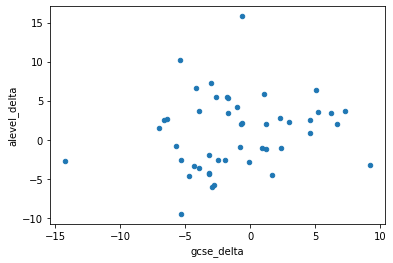

In [181]:
import matplotlib.pyplot as plt

qualification_df.plot(kind='scatter', x='gcse_delta',y='alevel_delta')
plt.show()

There are two areas that have an a level delta higher than 10

In [182]:
qualification_df[(qualification_df.alevel_delta >10)]

,County,gcse_candidates,gcse_county_percentage,gcse_national_percentage,alevel_candidates,alevel_county_percentage,alevel_national_percentage,gcse_delta,alevel_delta
12,East Riding of Yorkshire,665,28.1,33.5,55,94.4,84.2,-5.4,10.2
33,Rutland,75,32.9,33.5,80,100.0,84.2,-0.6,15.8


In [183]:
qualification_df[(qualification_df.gcse_delta >7) & (qualification_df.alevel_delta < 0) ]

,County,gcse_candidates,gcse_county_percentage,gcse_national_percentage,alevel_candidates,alevel_county_percentage,alevel_national_percentage,gcse_delta,alevel_delta
6,County of Bristol,455,42.7,33.5,115,81.0,84.2,9.2,-3.2


Bristol did worse in A Levels than national average, but much better at GCSE.

In [184]:
import geopandas as gpd

shp_map = gpd.read_file(r'C:\Users\Gareth.Ahern\Desktop\gadm36_GBR_shp\gadm36_GBR_3.shp')
shp_map['County'] = shp_map['NAME_3']
shp_map.head()

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,NL_NAME_2,GID_3,NAME_3,VARNAME_3,NL_NAME_3,TYPE_3,ENGTYPE_3,CC_3,HASC_3,geometry,County
0,GBR,United Kingdom,GBR.1_1,England,None,GBR.1.1_1,Barnsley,None,GBR.1.1.1_1,Barnsley,None,None,Metropolitan borough,Metropolitan borough,None,GB.BX.BX,"POLYGON ((-1.78997 53.47293, -1.79306 53.47778...",Barnsley
1,GBR,United Kingdom,GBR.1_1,England,None,GBR.1.2_1,Bath and North East Somerset,None,GBR.1.2.1_1,Bath and North East Somerset,None,None,Unitary authority,Unitary authority,None,GB.BN.BN,"POLYGON ((-2.68629 51.31516, -2.68066 51.32836...",Bath and North East Somerset
2,GBR,United Kingdom,GBR.1_1,England,None,GBR.1.3_1,Bedfordshire,None,GBR.1.3.1_1,Bedford,None,None,Unitary authority,Unitary authority,None,GB.FO.FO,"POLYGON ((-0.58508 52.11364, -0.58806 52.11805...",Bedford
3,GBR,United Kingdom,GBR.1_1,England,None,GBR.1.4_1,Birmingham,None,GBR.1.4.1_1,Birmingham,None,None,Metropolitan borough (city),Metropolitan borough (city),None,GB.BI.BI,"POLYGON ((-1.73417 52.51014, -1.73984 52.50894...",Birmingham
4,GBR,United Kingdom,GBR.1_1,England,None,GBR.1.5_1,Blackburn with Darwen,None,GBR.1.5.1_1,Blackburn with Darwen,None,None,Unitary authority,Unitary authority,None,GB.BW.BW,"POLYGON ((-2.51111 53.63377, -2.51317 53.63582...",Blackburn with Darwen


In [108]:
import urllib
import json

class API_Key(object):
    api_file = open(r"C:/Users/Gareth.Ahern/Desktop/PY4E/AsiaChoropleth/api_key.txt","r")
    API_KEY = api_file.read()
    API_KEY ='303f23d90amsh3dd821aee49310bp14c6d6jsncfcd6addf265'
    api_file.close()
        
class Location(object):
    
    address = None
    lat = None
    lon = None
    
    def getlatlon(self):
        api_key = API_Key()
        url =  "https://maps.googleapis.com/maps/api/geocode/json?address=" + self.address.replace(' ', '%20') + "&key=" + api_key.API_KEY
        uh = urllib.request.urlopen(url)
        data = uh.read().decode()
        js = json.loads(data)
        try:
            self.lat = js["results"][0]["geometry"]["location"]["lat"]
            self.lon = js["results"][0]["geometry"]["location"]["lng"]
        except:
            self.lat = None
            self.long = None
            
# =============================================================================
 #2. Get Location Coordinates from Address
address_df = pd.DataFrame(qualification_df.County.unique(),columns = ['County'])
 
address_df['LAT'] = None
address_df['LON'] = None
 
for i in range(len(address_df)):
    location = Location()
    location.address = address_df.iat[i,0]
    location.getlatlon()
   
    try:
        address_df.iat[i, address_df.columns.get_loc("LAT")] = location.lat
        address_df.iat[i, address_df.columns.get_loc("LON")] = location.lon
    except Exception as e:
        print(e)

#Some of the lat and longs could'nt be found in google so make sure they are dropped
address_df = address_df[address_df.LAT != None]  

#address_df.to_csv(r'C:/Users/Gareth.Ahern/Desktop/address_df.csv') 
# =======

In [185]:
address_df = pd.read_csv(r'C:/Users/Gareth.Ahern/Desktop/address_df.csv')
address_df.head(10)

,County,LAT,LONG
0,Aberdeenshire,57.345314,-1.641333
1,Angus,56.639217,-2.396047
2,Argyll and Bute,56.165890,-2.636786
3,Ayrshire and Arran,55.531396,-3.685162
4,Banffshire,57.504587,-3.639221
5,Bedfordshire,51.998172,-4.040046
6,Berkshire,51.439406,-3.618653
7,Berwickshire,55.832172,-3.423148
8,Bristol,51.458904,-3.543916
9,Buckinghamshire,51.825327,-3.569292


In [186]:
qualification_df = pd.merge(qualification_df,address_df, on="County")
qualification_df.head()

,County,gcse_candidates,gcse_county_percentage,gcse_national_percentage,alevel_candidates,alevel_county_percentage,alevel_national_percentage,gcse_delta,alevel_delta,LAT,LONG
0,Bedfordshire,1015,30.3,33.5,210,82.2,84.2,-3.2,-2.0,51.998172,-4.040046
1,Berkshire,2010,38.7,33.5,325,87.8,84.2,5.2,3.6,51.439406,-3.618653
2,Buckinghamshire,1355,40.8,33.5,215,87.9,84.2,7.3,3.7,51.825327,-3.569292
3,Cambridgeshire,1100,36.5,33.5,185,86.5,84.2,3.0,2.3,52.344095,-2.275476
4,Cheshire,1495,31.7,33.5,235,89.7,84.2,-1.8,5.5,53.221664,-4.210853


In [187]:
type(qualification_df)

pandas.core.frame.DataFrame

In [188]:
from geopandas import GeoDataFrame
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(qualification_df.LONG, qualification_df.LAT)]
qualification_df = qualification_df.drop(['LONG', 'LAT'], axis=1)
gdf = GeoDataFrame(qualification_df, crs={'init': 'epsg:4326'}, geometry=geometry)
gdf.head()

,County,gcse_candidates,gcse_county_percentage,gcse_national_percentage,alevel_candidates,alevel_county_percentage,alevel_national_percentage,gcse_delta,alevel_delta,geometry
0,Bedfordshire,1015,30.3,33.5,210,82.2,84.2,-3.2,-2.0,POINT (-4.04005 51.99817)
1,Berkshire,2010,38.7,33.5,325,87.8,84.2,5.2,3.6,POINT (-3.61865 51.43941)
2,Buckinghamshire,1355,40.8,33.5,215,87.9,84.2,7.3,3.7,POINT (-3.56929 51.82533)
3,Cambridgeshire,1100,36.5,33.5,185,86.5,84.2,3.0,2.3,POINT (-2.27548 52.34409)
4,Cheshire,1495,31.7,33.5,235,89.7,84.2,-1.8,5.5,POINT (-4.21085 53.22166)


In [189]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [190]:
merged_df = shp_map.join(gdf,lsuffix='_left', rsuffix='_right')
merged_df.reset_index(inplace=True)

merged_df

,index,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,NL_NAME_2,GID_3,...,County_right,gcse_candidates,gcse_county_percentage,gcse_national_percentage,alevel_candidates,alevel_county_percentage,alevel_national_percentage,gcse_delta,alevel_delta,geometry_right
0,0,GBR,United Kingdom,GBR.1_1,England,None,GBR.1.1_1,Barnsley,None,GBR.1.1.1_1,...,Bedfordshire,1015.0,30.3,33.5,210.0,82.2,84.2,-3.2,-2.0,POINT (-4.04005 51.99817)
1,1,GBR,United Kingdom,GBR.1_1,England,None,GBR.1.2_1,Bath and North East Somerset,None,GBR.1.2.1_1,...,Berkshire,2010.0,38.7,33.5,325.0,87.8,84.2,5.2,3.6,POINT (-3.61865 51.43941)
2,2,GBR,United Kingdom,GBR.1_1,England,None,GBR.1.3_1,Bedfordshire,None,GBR.1.3.1_1,...,Buckinghamshire,1355.0,40.8,33.5,215.0,87.9,84.2,7.3,3.7,POINT (-3.56929 51.82533)
3,3,GBR,United Kingdom,GBR.1_1,England,None,GBR.1.4_1,Birmingham,None,GBR.1.4.1_1,...,Cambridgeshire,1100.0,36.5,33.5,185.0,86.5,84.2,3.0,2.3,POINT (-2.27548 52.34409)
4,4,GBR,United Kingdom,GBR.1_1,England,None,GBR.1.5_1,Blackburn with Darwen,None,GBR.1.5.1_1,...,Cheshire,1495.0,31.7,33.5,235.0,89.7,84.2,-1.8,5.5,POINT (-4.21085 53.22166)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,401,GBR,United Kingdom,GBR.4_1,Wales,None,GBR.4.18_1,"Rhondda, Cynon, Taff",None,GBR.4.18.1_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
402,402,GBR,United Kingdom,GBR.4_1,Wales,None,GBR.4.19_1,Swansea,None,GBR.4.19.1_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
403,403,GBR,United Kingdom,GBR.4_1,Wales,None,GBR.4.20_1,Torfaen,None,GBR.4.20.1_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
404,404,GBR,United Kingdom,GBR.4_1,Wales,None,GBR.4.21_1,Vale of Glamorgan,None,GBR.4.21.1_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


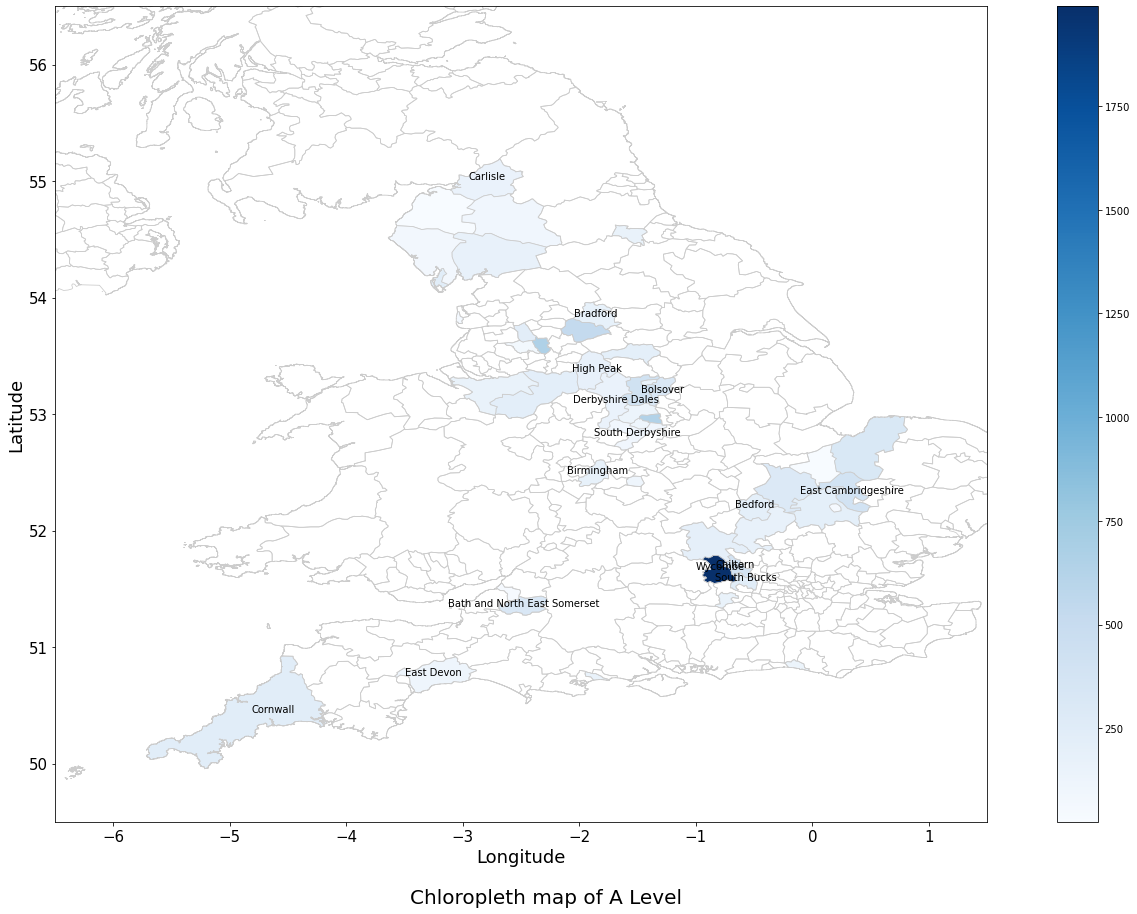

In [193]:
fig, ax = plt.subplots(1, figsize=(25, 15))
merged_df['geometry'] =merged_df['geometry_left']
merged_df['coords'] = merged_df['geometry'].apply(lambda x: x.representative_point().coords[:])
merged_df['coords'] = [coords[0] for coords in merged_df['coords']]

#We can label the areas, but there are too many areas => too many labels, so I wont do this
for idx, row in merged_df.iterrows():
    if row['gcse_county_percentage'] > row['gcse_national_percentage']:
        plt.annotate(text=row['NAME_3'], xy=row['coords'], horizontalalignment='center')
    
ax.margins(0.2, 0.2)
ax.set_xlabel('Longitude', fontsize=18)
ax.set_ylabel('Latitude', fontsize=18)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_xlim(-6.5, 1.5)
ax.set_ylim(49.5, 56.5)
txt='Chloropleth map of A Level'
plt.figtext(0.5, 0.05, txt, wrap=True, horizontalalignment='center', fontsize=20)

merged_df.plot(column='alevel_candidates', ax=ax, legend=True, cmap='Blues', linewidth=0.8, edgecolor='0.8')
fig.savefig(r'C:/Users/Gareth.Ahern/Desktop/ALevelChoropleth.png')

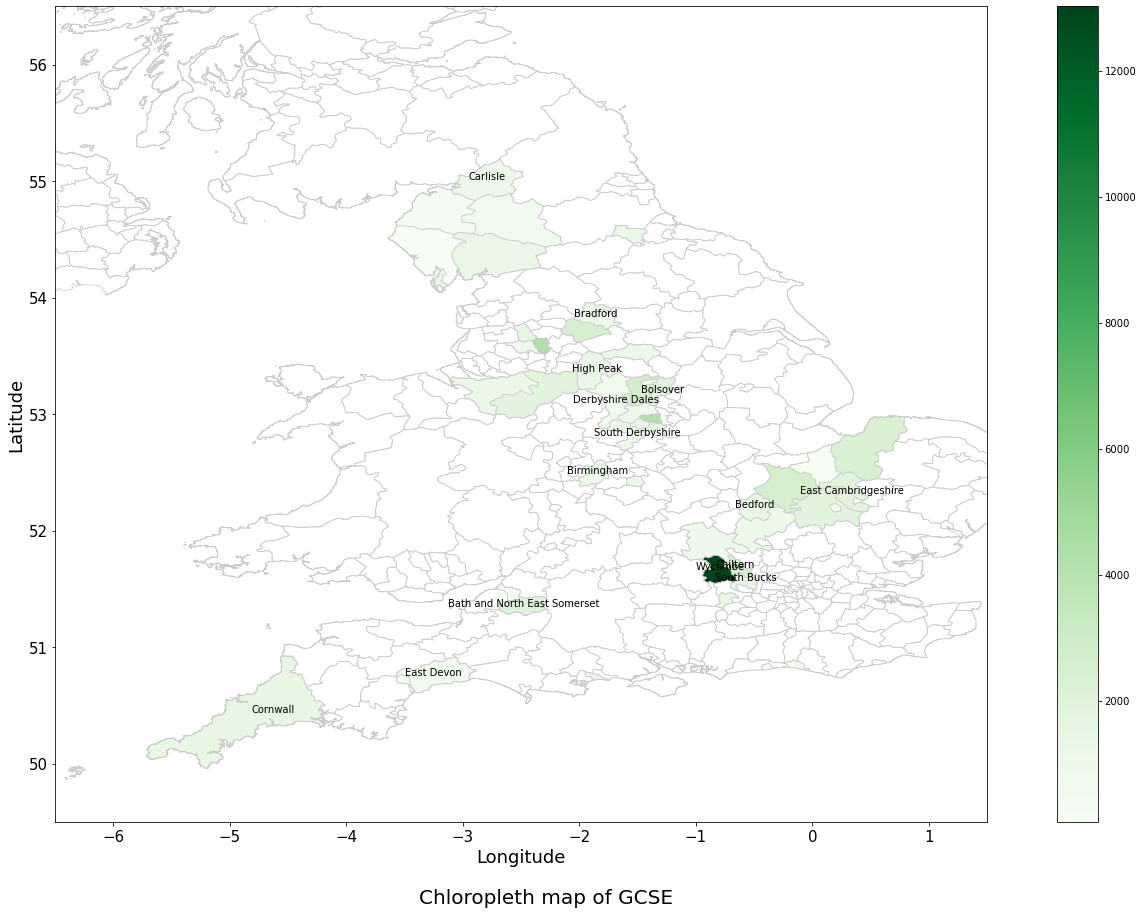

In [195]:
fig, ax = plt.subplots(1, figsize=(25, 15))
merged_df['geometry'] =merged_df['geometry_left']
merged_df['coords'] = merged_df['geometry'].apply(lambda x: x.representative_point().coords[:])
merged_df['coords'] = [coords[0] for coords in merged_df['coords']]

#We can label the areas, but there are too many areas => too many labels, so I wont do this
for idx, row in merged_df.iterrows():
    if row['gcse_county_percentage'] > row['gcse_national_percentage']:
        plt.annotate(text=row['NAME_3'], xy=row['coords'], horizontalalignment='center')
    
ax.margins(0.2, 0.2)
ax.set_xlabel('Longitude', fontsize=18)
ax.set_ylabel('Latitude', fontsize=18)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_xlim(-6.5, 1.5)
ax.set_ylim(49.5, 56.5)
txt='Chloropleth map of GCSE'
plt.figtext(0.5, 0.05, txt, wrap=True, horizontalalignment='center', fontsize=20)

merged_df.plot(column='gcse_candidates', ax=ax, legend=True, cmap='Greens', linewidth=0.8, edgecolor='0.8')
fig.savefig(r'C:/Users/Gareth.Ahern/Desktop/GCSEChoropleth.png')

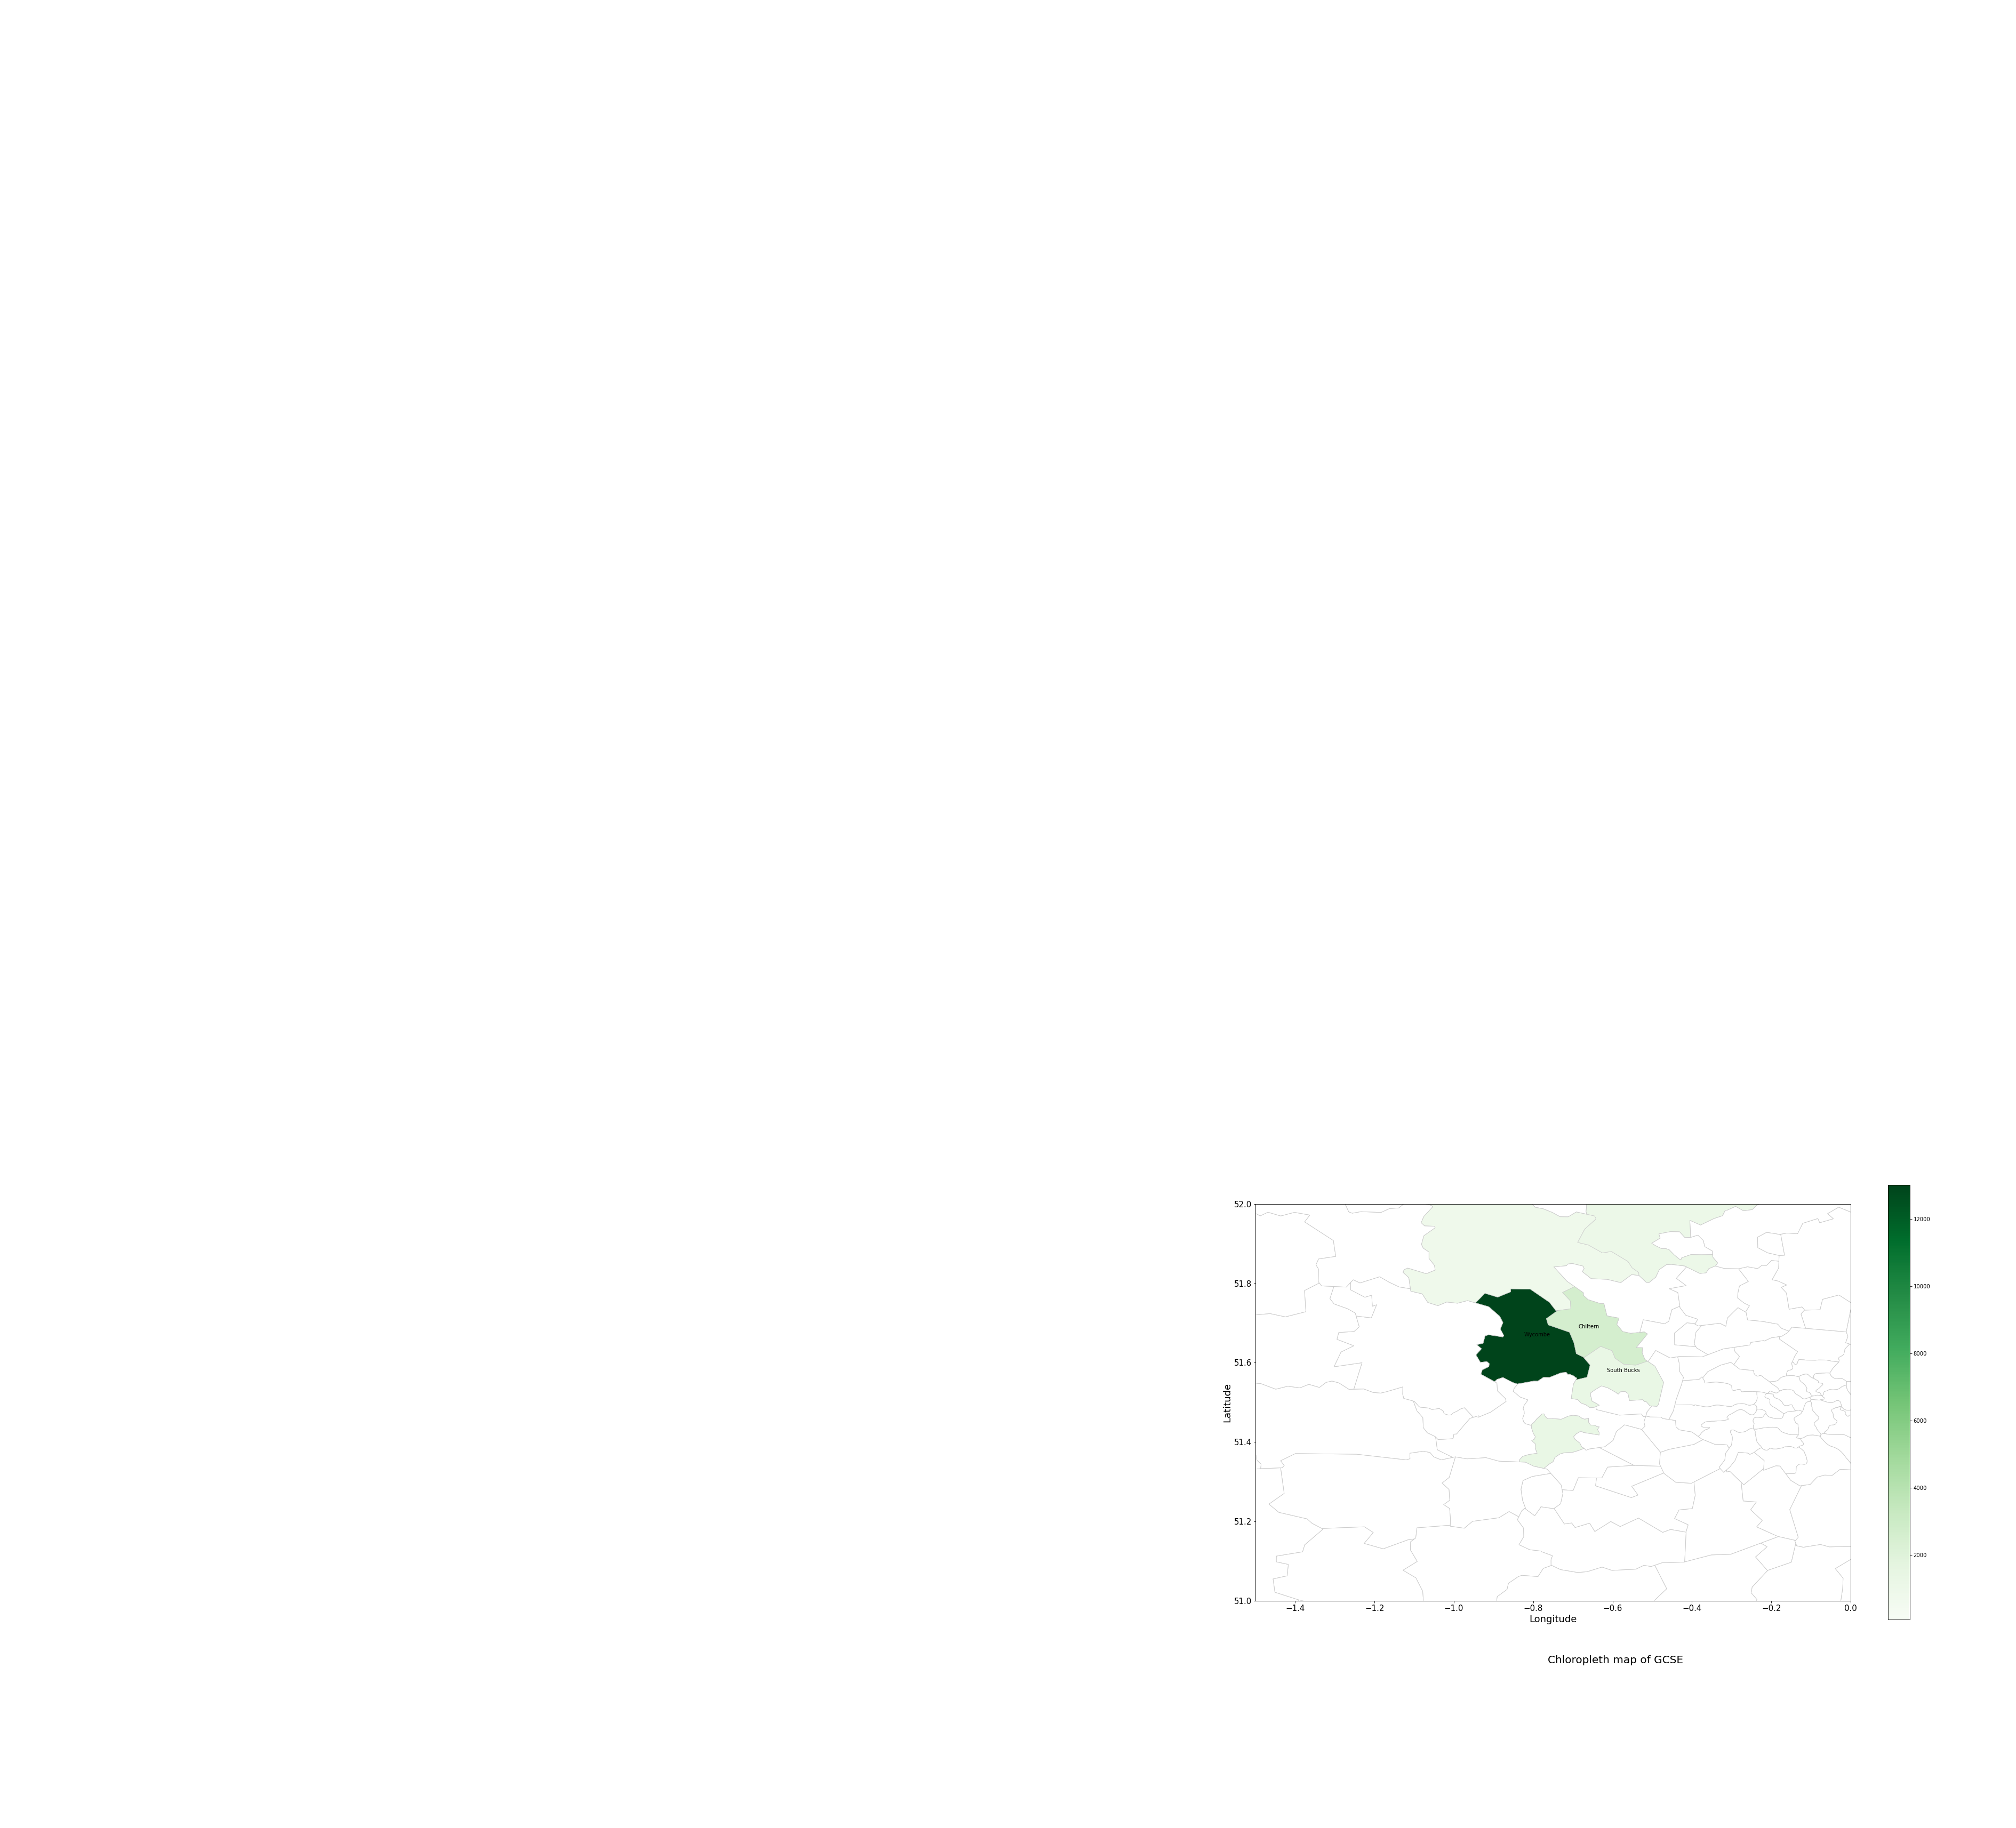

In [196]:
fig, ax = plt.subplots(1, figsize=(25, 15))
merged_df['geometry'] =merged_df['geometry_left']
merged_df['coords'] = merged_df['geometry'].apply(lambda x: x.representative_point().coords[:])
merged_df['coords'] = [coords[0] for coords in merged_df['coords']]

#We can label the areas, but there are too many areas => too many labels, so I wont do this
for idx, row in merged_df.iterrows():
    if row['gcse_county_percentage'] > row['gcse_national_percentage']:
        plt.annotate(text=row['NAME_3'], xy=row['coords'], horizontalalignment='center')
    
ax.set_xlabel('Longitude', fontsize=18)
ax.set_ylabel('Latitude', fontsize=18)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_xlim(-1.5, 0)
ax.set_ylim(51, 52)
txt='Chloropleth map of GCSE'
plt.figtext(0.5, 0.05, txt, wrap=True, horizontalalignment='center', fontsize=20)

merged_df.plot(column='gcse_candidates', ax=ax, legend=True, cmap='Greens', linewidth=0.8, edgecolor='0.8')
fig.savefig(r'C:/Users/Gareth.Ahern/Desktop/GCSEChoroplethzoom.png')